In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

In [2]:
application = pd.read_csv("data/application_data.csv")
previous_application = pd.read_csv("data/previous_application.csv")
column_desc = pd.read_csv("data/columns_description.csv").set_index("Unnamed: 0")

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
pd.set_option("display.max_colwidth",None)
pd.options.display.float_format = '{:,.3f}'.format

In [4]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

In [5]:
sns.set_style("darkgrid")

In [6]:
cat = application.select_dtypes(include='object').columns
num = application.select_dtypes(exclude='object').columns
object_features = []
for cols in num:
    if(len(application[cols].value_counts())<20):
        object_features.append(cols)
application[object_features] = application[object_features].astype('object')
num = num.drop(object_features)
cat = application.select_dtypes(include='object').columns
print(num,'\n',cat)

Index(['SK_ID_CURR', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXP

In [5]:
application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,"202,500.000","406,597.500","24,700.500","351,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,"-3,648.000",-2120,nan,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,"-1,134.000",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000
1,100003,0,Cash loans,F,N,N,0,"270,000.000","1,293,502.500","35,698.500","1,129,500.000",Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,"-1,186.000",-291,nan,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,nan,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000
2,100004,0,Revolving loans,M,Y,Y,0,"67,500.000","135,000.000","6,750.000","135,000.000",Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,"-4,260.000",-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,nan,0.556,0.730,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

### Organization Type with Occupation Type defaulters for whole Dataset

### Organization Type with Occupation Type Defaulter rates

In [7]:
a = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.unstack().drop([('SK_ID_CURR',0),('Defaulter_rates',0)],axis=1).stack().droplevel(level=-1)
a['SK_ID_CURR'] = a_level1
a = a.rename(columns={'SK_ID_CURR':'Totalcount'}).sort_values('Defaulter_rates',ascending=False)
a_top = a[a['Totalcount']>16]
# a_top = a_top.drop(['Secretaries','Waiters/barmen staff','Private service staff','Realty agents','HR staff'],level=1)
a_top = a_top[:15]
a_top

,,Totalcount,Defaulter_rates
ORGANIZATION_TYPE,OCCUPATION_TYPE,,
Construction,Low-skill Laborers,71,26.761
Industry: type 1,Security staff,22,22.727
Housing,Low-skill Laborers,23,21.739
Transport: type 4,Low-skill Laborers,23,21.739
Trade: type 7,Low-skill Laborers,74,20.270
Government,Low-skill Laborers,51,19.608
Self-employed,Low-skill Laborers,419,19.332
Transport: type 3,Laborers,42,19.048
Hotel,Cleaning staff,27,18.519


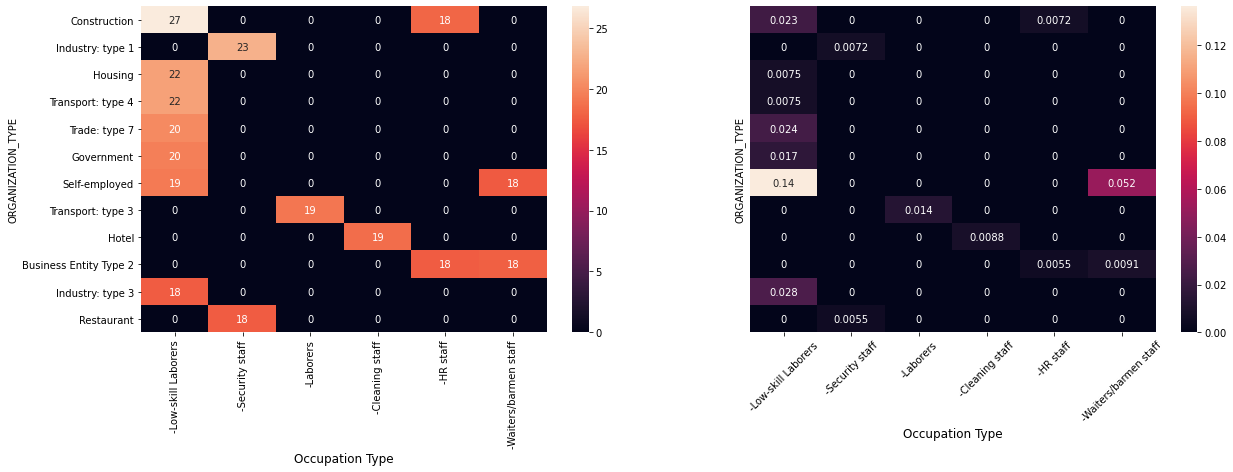

In [18]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.heatmap(a_top.drop('Totalcount',axis=1).rename(columns={'Defaulter_rates':''}).unstack().fillna(0),annot=True,ax=ax[0])
sns.heatmap((a_top.drop('Defaulter_rates',axis=1).rename(columns={'Totalcount':''})/len(application)*100)
            .unstack().fillna(0),annot=True,ax=ax[1])
# ax[0].tick_params(left=False, bottom=False)
ax[1].set_yticks([])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
ax[0].set_xlabel('Occupation Type',size=12)
ax[1].set_xlabel('Occupation Type',size=12)
plt.show()
#+theme(axis.text.y = element_blank())

There are high number of __Self Employed Low skilled Laborers__ at 0.14% of the total clients and also have a high defaulter rate at 19%

### Organization Type with Occupation Type Defaulter rates for client types with low defaulter rates

In [9]:
a = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1
a = a.rename(columns={'SK_ID_CURR':'Totalcount'}).sort_values('Defaulter_rates')
a_low = a[a['Totalcount']>15]
a_low = a_low[:10]
a_low

,,Totalcount,Defaulter_rates
ORGANIZATION_TYPE,OCCUPATION_TYPE,,
Industry: type 9,Core staff,85,1.176
Kindergarten,High skill tech staff,81,1.235
Industry: type 11,Accountants,78,1.282
Transport: type 2,Managers,73,1.370
Trade: type 6,Managers,73,1.370
University,Core staff,276,1.449
Electricity,Managers,59,1.695
University,Accountants,59,1.695
Emergency,High skill tech staff,57,1.754


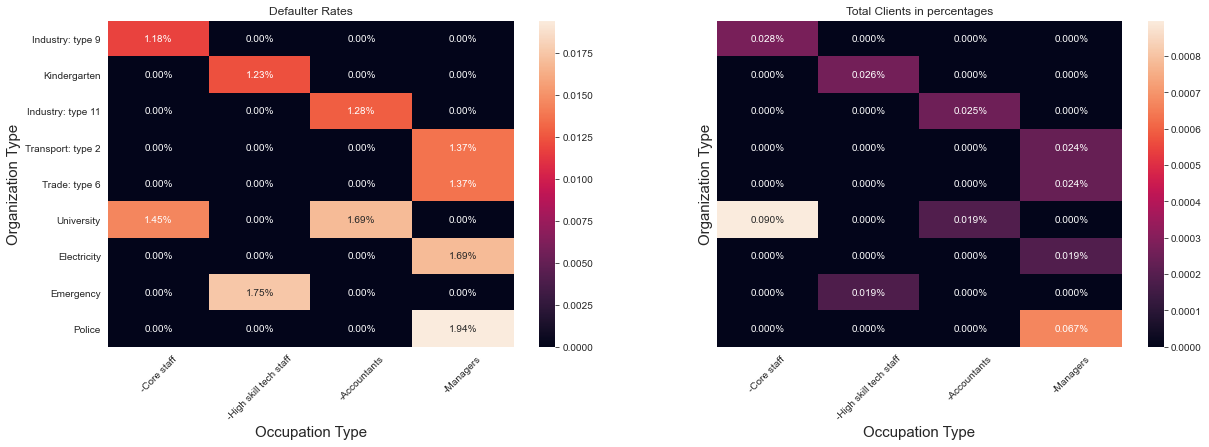

In [12]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.heatmap(a_low.drop('Totalcount',axis=1).rename(columns={'Defaulter_rates':''}).unstack().fillna(0)/100,annot=True,fmt=".2%"
            ,ax=ax[0])
plt.sca(ax[0])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Occupation Type',size=15)
plt.ylabel('Organization Type',size=15)
plt.title('Defaulter Rates')


sns.heatmap((a_low.drop('Defaulter_rates',axis=1).rename(columns={'Totalcount':''})/len(application)*100)
            .unstack().fillna(0)/100,annot=True,fmt=".3%",ax=ax[1])
ax[1].set_yticks([])
plt.sca(ax[1])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Occupation Type',size=15)
plt.ylabel('Organization Type',size=15)
plt.title('Total Clients in percentages')
plt.show()
#+theme(axis.text.y = element_blank())

### Organization Type with Occupation Type Defaulter rates for Client types of highest frequeny

In [13]:
a = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1
a = a.rename(columns={'SK_ID_CURR':'Totalcount'}).sort_values('Totalcount',ascending=False)
a_low = a[a['Totalcount']>15]
# a_low = a_low.drop(['Secretaries','Waiters/barmen staff','Private service staff','Realty agents','HR staff'],level=1)
a_low = a_low[:18]
a_low

Totalcount  Defaulter_rates
ORGANIZATION_TYPE      OCCUPATION_TYPE                                   
Business Entity Type 3 Laborers                    17484           11.050
Self-employed          Sales staff                 13189            9.531
Business Entity Type 3 Sales staff                  8853            9.624
                       Managers                     7138            6.977
Self-employed          Laborers                     6298           11.972
Medicine               Medicine staff               5937            6.956
Business Entity Type 3 Drivers                      5475           11.507
Business Entity Type 2 Laborers                     4429            9.754
Self-employed          Drivers                      4179           13.496
School                 Core staff                   4171            4.196
Kindergarten           Core staff                   4054            6.734
Trade: type 7          Sales staff                  4052            9.970
Construction           Laborers                     3367           14.078
Self-employed          Managers                     3270            7.859
Business Entity Type 3 Accountants                  3249            4.401
                       High skill tech staff        3153            6.343
Other                  Laborers                     3016           10.411
Self-employed          Core staff                   2638            7.847

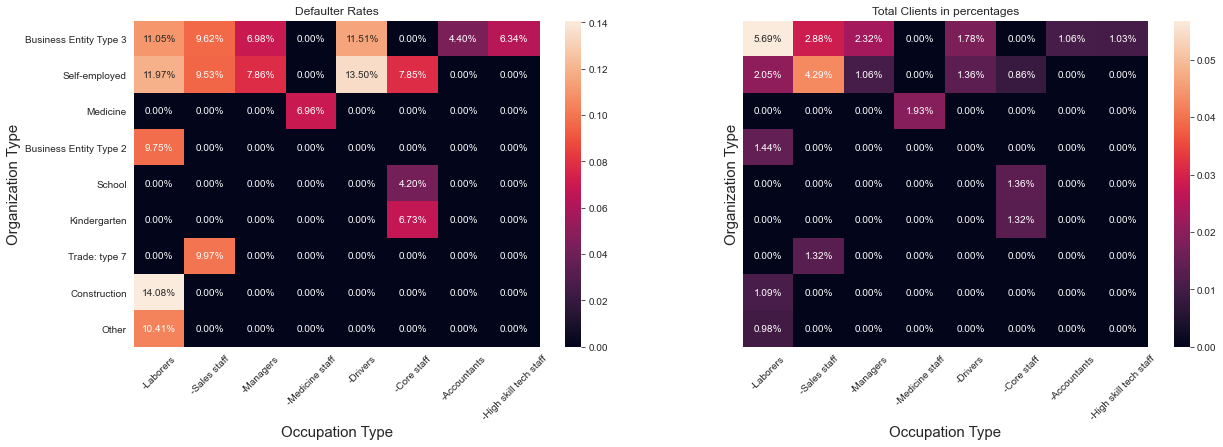

In [15]:
fig,ax = plt.subplots(1,2,figsize=(20,6))
sns.heatmap(a_low.drop('Totalcount',axis=1).rename(columns={'Defaulter_rates':''}).unstack().fillna(0)/100,annot=True,fmt=".2%"
            ,ax=ax[0])
plt.sca(ax[0])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Occupation Type',size=15)
plt.ylabel('Organization Type',size=15)
plt.title('Defaulter Rates')


sns.heatmap((a_low.drop('Defaulter_rates',axis=1).rename(columns={'Totalcount':''})/len(application)*100)
            .unstack().fillna(0)/100,annot=True,fmt=".2%",ax=ax[1])
ax[1].set_yticks([])
plt.sca(ax[1])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Occupation Type',size=15)
plt.ylabel('Organization Type',size=15)
plt.title('Total Clients in percentages')
plt.show()

- __5.7%__ of our Clients are __Laborers__ from __Business Entity type 3__ and they have __11%__ defaulter rates.
- Followed by __Sales Staff__ who are __Self Employed__ or are from __Business Entity type 3__ who are also in higher numbers __(4.3% and 2.9%)__ and also have a high defaulter rate at __9.5%__ and __9.6%__ respectively.

,NAME_CONTRACT_TYPE,COUNT,TARGET,DEFAULTER_RATES
0,Cash loans,90.479,1,8.346
1,Revolving loans,9.521,1,5.478


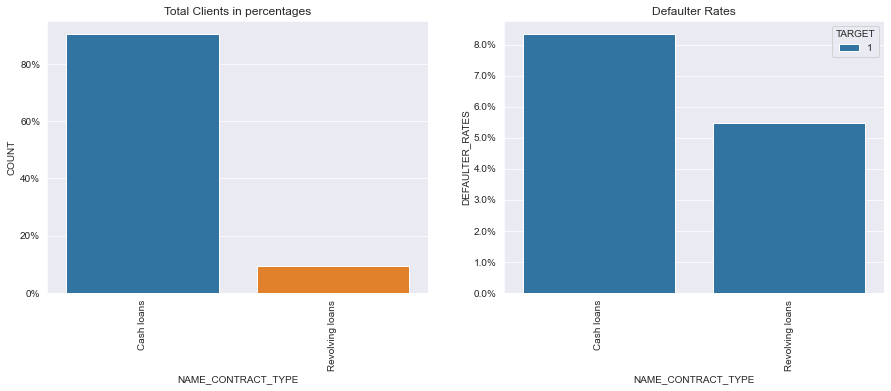

,CODE_GENDER,COUNT,TARGET,DEFAULTER_RATES
0,F,65.834,1,6.999
1,M,34.164,1,10.142


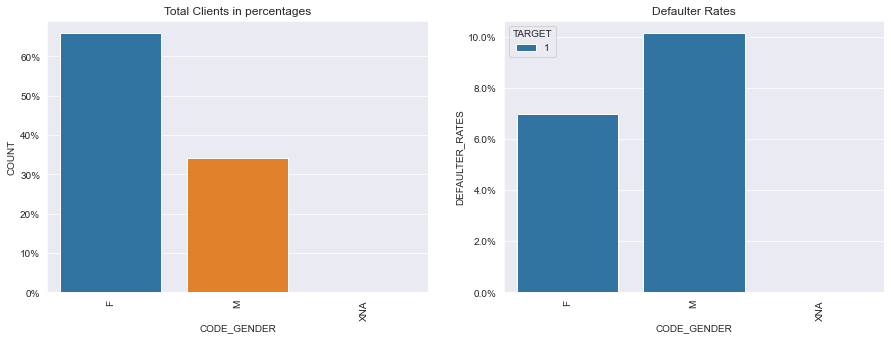

,FLAG_OWN_CAR,COUNT,TARGET,DEFAULTER_RATES
0,N,65.989,1,8.500
1,Y,34.011,1,7.244


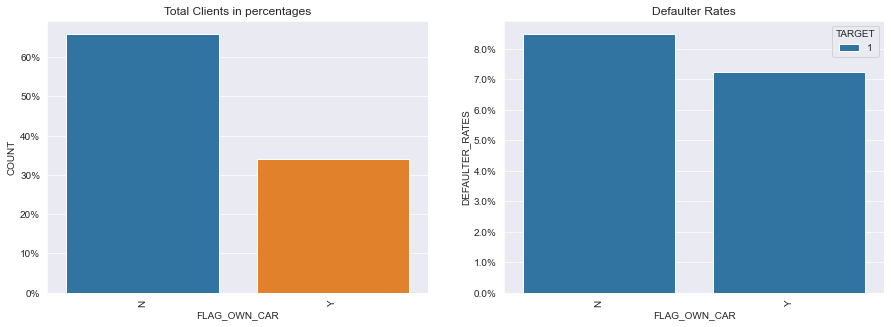

,FLAG_OWN_REALTY,COUNT,TARGET,DEFAULTER_RATES
0,Y,69.367,1,7.962
1,N,30.633,1,8.325


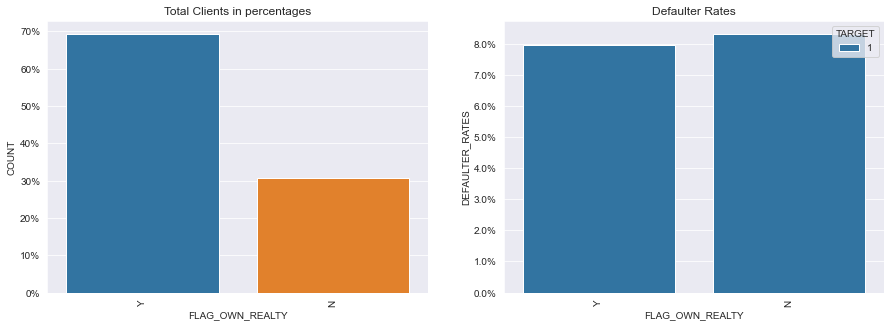

,CNT_CHILDREN,COUNT,TARGET,DEFAULTER_RATES
0,0,70.037,1,7.712
1,1,19.875,1,8.924
2,2,8.699,1,8.722
3,3,1.209,1,9.631
4,4,0.140,1,12.821
5,5,0.027,1,8.333
6,6,0.007,1,28.571
7,9,0.001,1,100.000
8,11,0.000,1,100.000


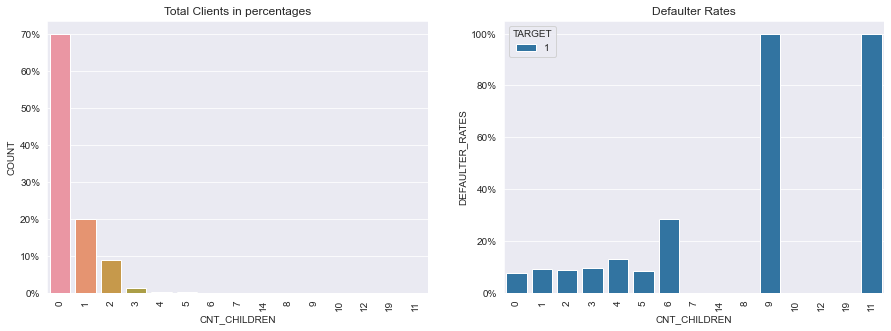

,NAME_TYPE_SUITE,COUNT,TARGET,DEFAULTER_RATES
0,Unaccompanied,80.819,1,8.183
1,Family,13.056,1,7.495
2,"Spouse, partner",3.697,1,7.872
3,Children,1.062,1,7.377
4,Other_B,0.576,1,9.831
5,Other_A,0.282,1,8.776
6,Group of people,0.088,1,8.487


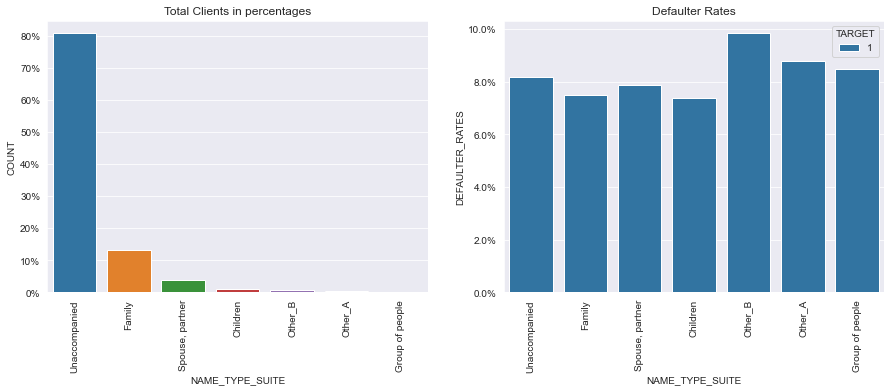

,NAME_INCOME_TYPE,COUNT,TARGET,DEFAULTER_RATES
0,Working,51.632,1,9.588
1,Commercial associate,23.289,1,7.484
2,Pensioner,18.003,1,5.386
3,State servant,7.058,1,5.755
4,Unemployed,0.007,1,36.364
5,Maternity leave,0.002,1,40.000


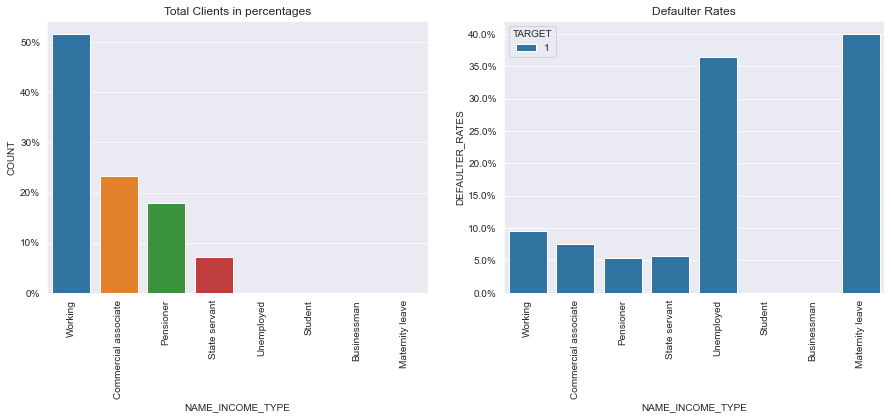

,NAME_EDUCATION_TYPE,COUNT,TARGET,DEFAULTER_RATES
0,Secondary / secondary special,71.019,1,8.940
1,Higher education,24.345,1,5.355
2,Incomplete higher,3.342,1,8.485
3,Lower secondary,1.241,1,10.928
4,Academic degree,0.053,1,1.829


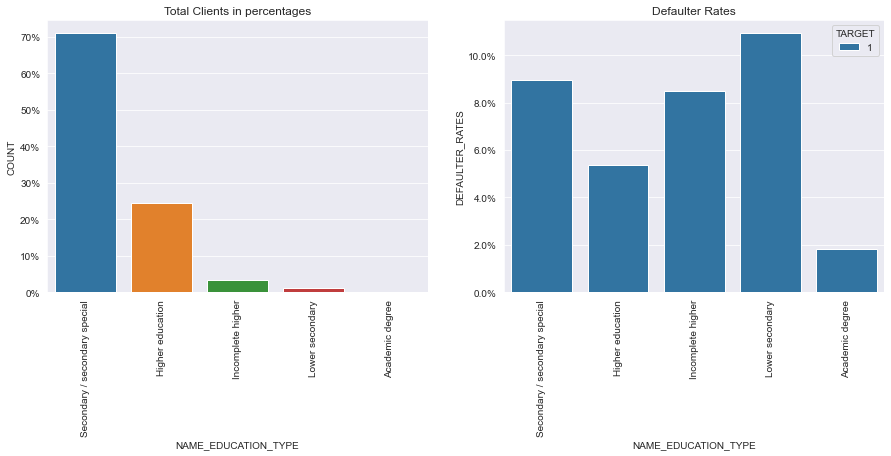

,NAME_FAMILY_STATUS,COUNT,TARGET,DEFAULTER_RATES
0,Married,63.878,1,7.560
1,Single / not married,14.778,1,9.808
2,Civil marriage,9.683,1,9.945
3,Separated,6.429,1,8.194
4,Widow,5.232,1,5.824


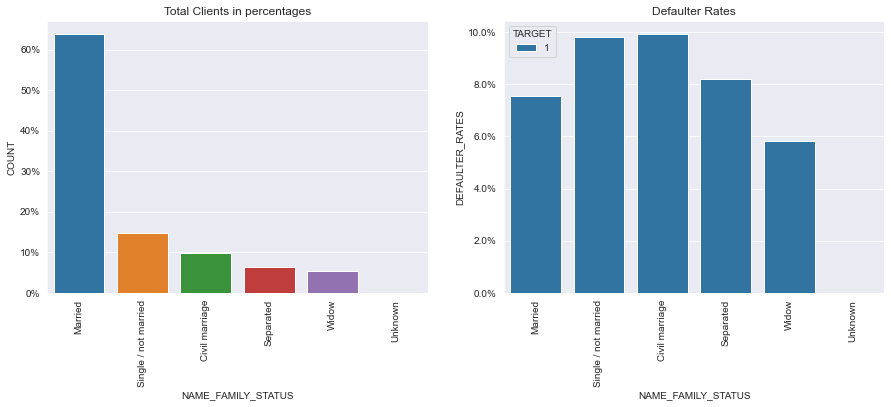

,NAME_HOUSING_TYPE,COUNT,TARGET,DEFAULTER_RATES
0,House / apartment,88.734,1,7.796
1,With parents,4.826,1,11.698
2,Municipal apartment,3.637,1,8.540
3,Rented apartment,1.587,1,12.313
4,Office apartment,0.851,1,6.572
5,Co-op apartment,0.365,1,7.932


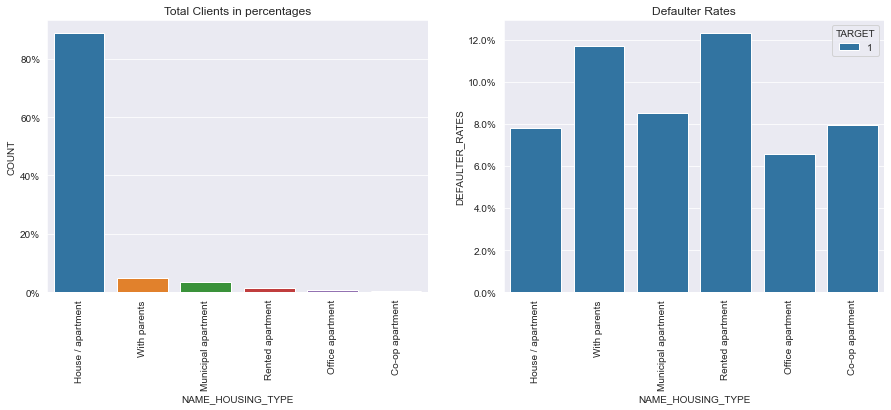

,FLAG_MOBIL,COUNT,TARGET,DEFAULTER_RATES
0,1,100.000,1,8.073


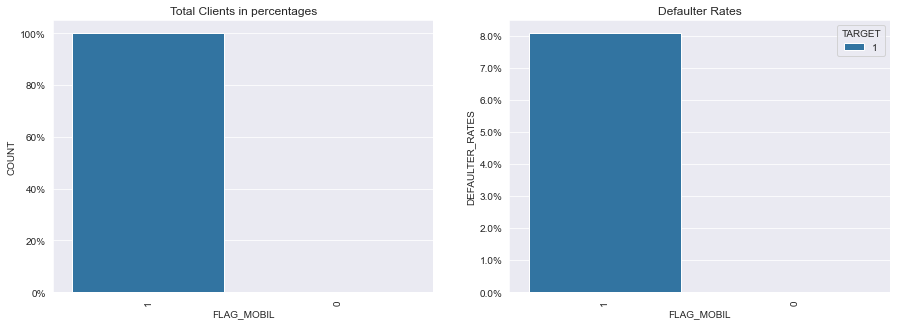

,FLAG_EMP_PHONE,COUNT,TARGET,DEFAULTER_RATES
0,1,81.989,1,8.660
1,0,18.011,1,5.400


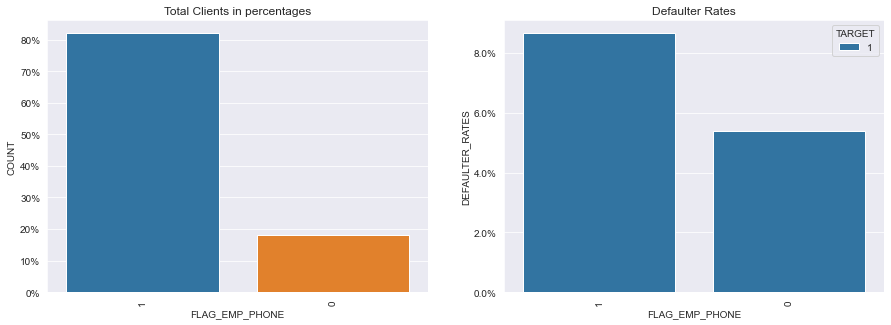

,FLAG_WORK_PHONE,COUNT,TARGET,DEFAULTER_RATES
0,0,80.063,1,7.685
1,1,19.937,1,9.630


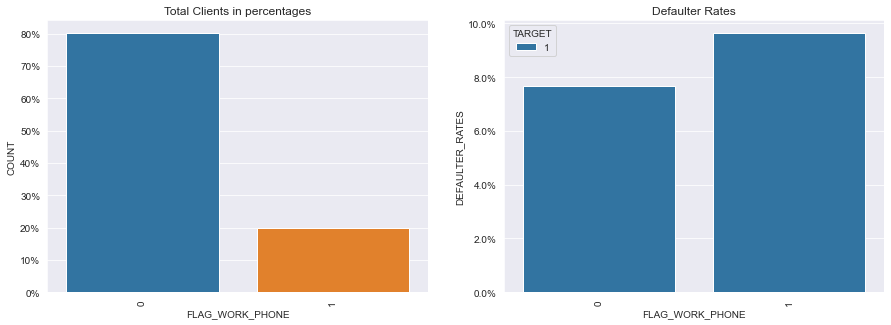

,FLAG_CONT_MOBILE,COUNT,TARGET,DEFAULTER_RATES
0,1,99.813,1,8.073
1,0,0.187,1,7.840


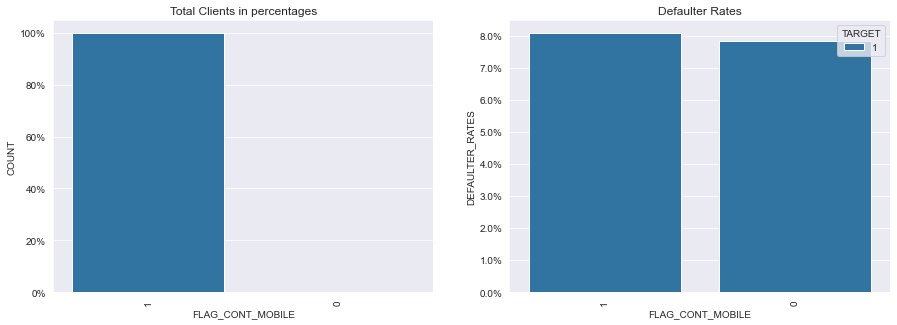

,FLAG_PHONE,COUNT,TARGET,DEFAULTER_RATES
0,0,71.893,1,8.478
1,1,28.107,1,7.036


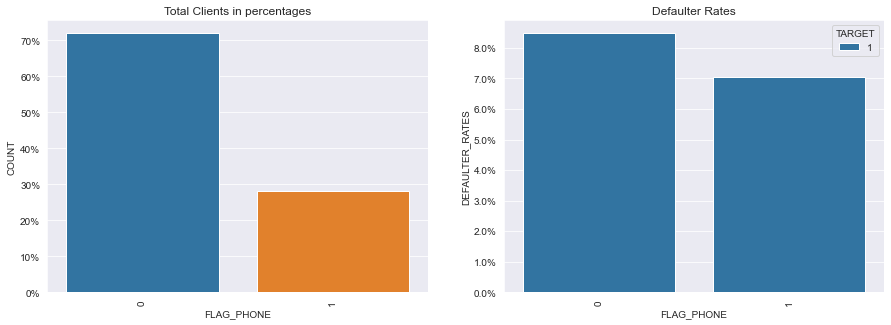

,FLAG_EMAIL,COUNT,TARGET,DEFAULTER_RATES
0,0,94.328,1,8.085
1,1,5.672,1,7.878


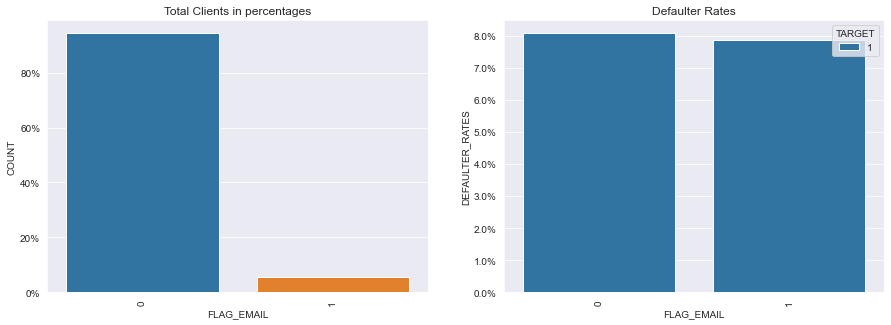

,OCCUPATION_TYPE,COUNT,TARGET,DEFAULTER_RATES
0,Laborers,17.946,1,10.579
1,Sales staff,10.439,1,9.632
2,Core staff,8.966,1,6.304
3,Managers,6.950,1,6.214
4,Drivers,6.050,1,11.326
5,High skill tech staff,3.701,1,6.160
6,Accountants,3.191,1,4.830
7,Medicine staff,2.776,1,6.700
8,Security staff,2.186,1,10.742
9,Cooking staff,1.934,1,10.444


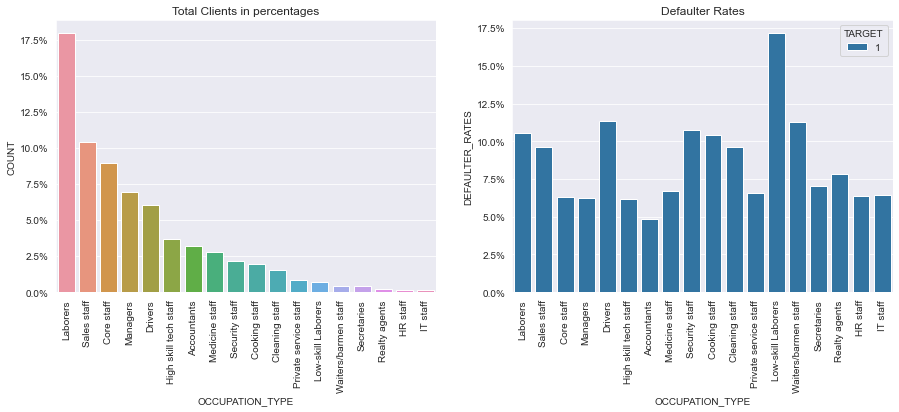

,CNT_FAM_MEMBERS,COUNT,TARGET,DEFAULTER_RATES
0,2.000,51.496,1,7.583
1,1.000,22.063,1,8.364
2,3.000,17.105,1,8.760
3,4.000,8.031,1,8.649
4,5.000,1.131,1,9.402
5,6.000,0.133,1,13.480
6,7.000,0.026,1,7.407
7,8.000,0.007,1,30.000
8,10.000,0.001,1,33.333
9,11.000,0.000,1,100.000


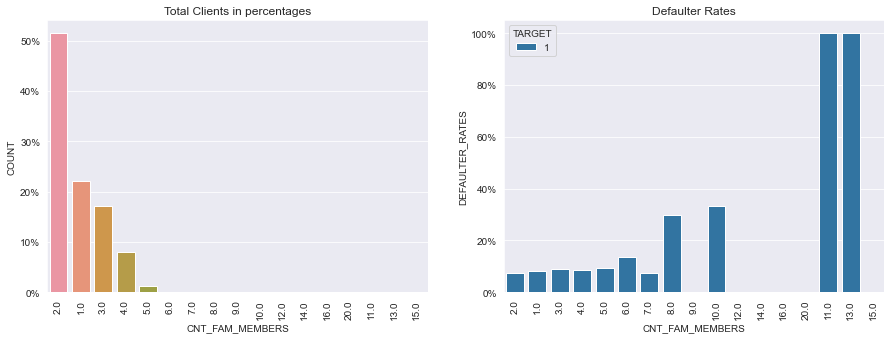

,REGION_RATING_CLIENT,COUNT,TARGET,DEFAULTER_RATES
0,2,73.813,1,7.889
1,3,15.717,1,11.103
2,1,10.470,1,4.820


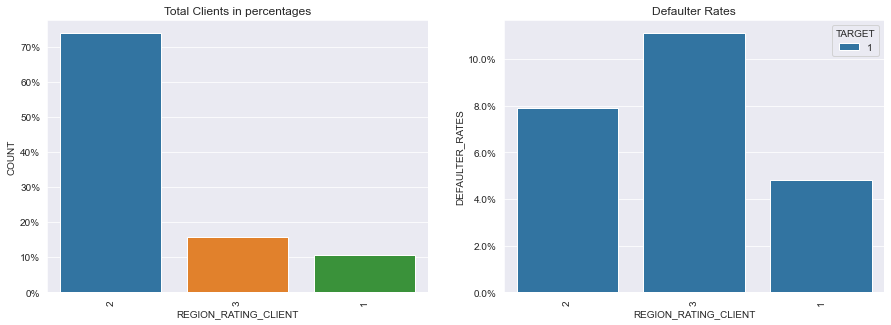

,REGION_RATING_CLIENT_W_CITY,COUNT,TARGET,DEFAULTER_RATES
0,2,74.626,1,7.918
1,3,14.263,1,11.402
2,1,11.111,1,4.841


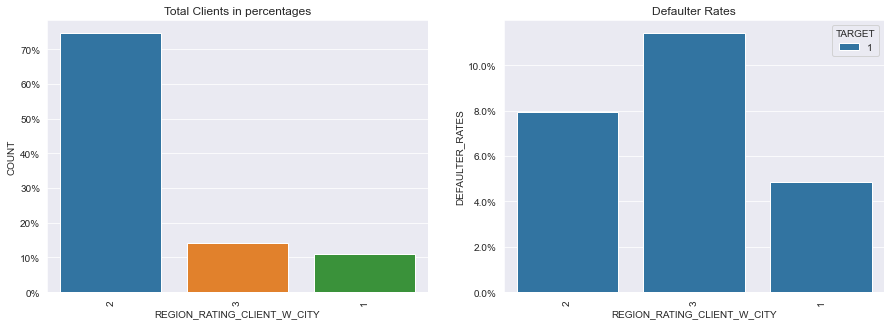

,WEEKDAY_APPR_PROCESS_START,COUNT,TARGET,DEFAULTER_RATES
0,TUESDAY,17.528,1,8.350
1,WEDNESDAY,16.889,1,8.160
2,MONDAY,16.492,1,7.757
3,THURSDAY,16.452,1,8.100
4,FRIDAY,16.369,1,8.147
5,SATURDAY,11.008,1,7.887
6,SUNDAY,5.262,1,7.929


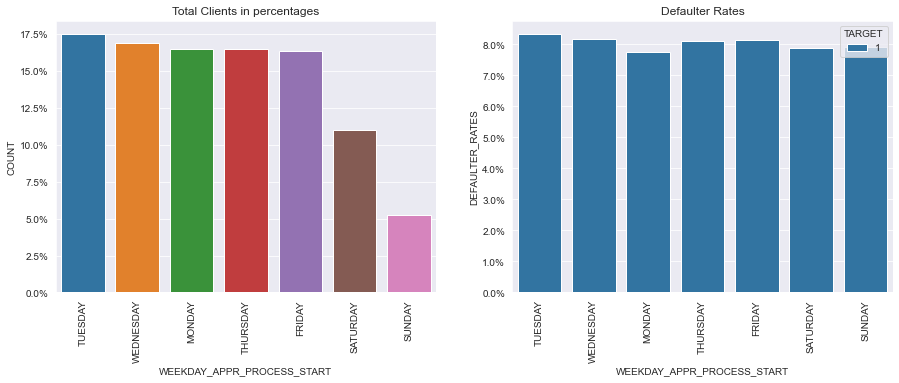

,REG_REGION_NOT_LIVE_REGION,COUNT,TARGET,DEFAULTER_RATES
0,0,98.486,1,8.054
1,1,1.514,1,9.298


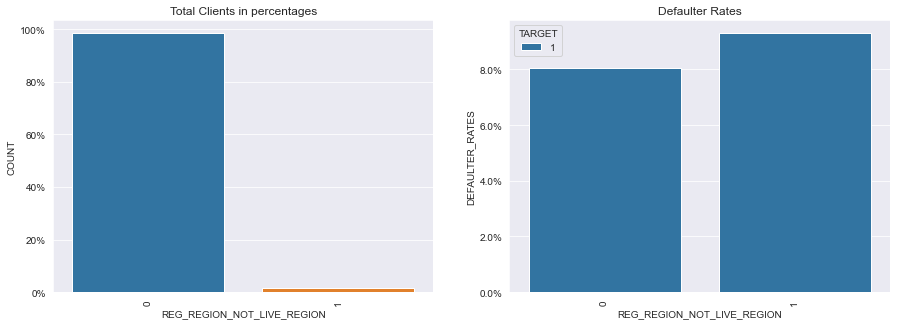

,REG_REGION_NOT_WORK_REGION,COUNT,TARGET,DEFAULTER_RATES
0,0,94.923,1,8.029
1,1,5.077,1,8.891


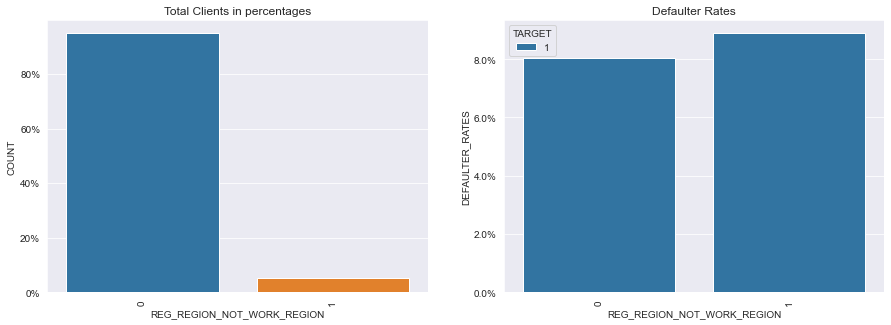

,LIVE_REGION_NOT_WORK_REGION,COUNT,TARGET,DEFAULTER_RATES
0,0,95.934,1,8.057
1,1,4.066,1,8.446


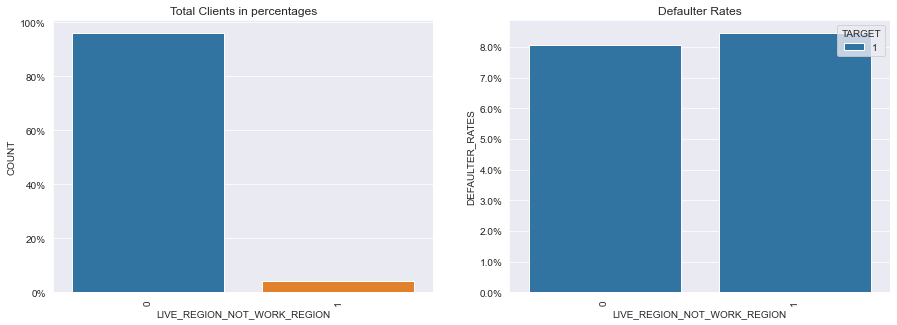

,REG_CITY_NOT_LIVE_CITY,COUNT,TARGET,DEFAULTER_RATES
0,0,92.183,1,7.721
1,1,7.817,1,12.226


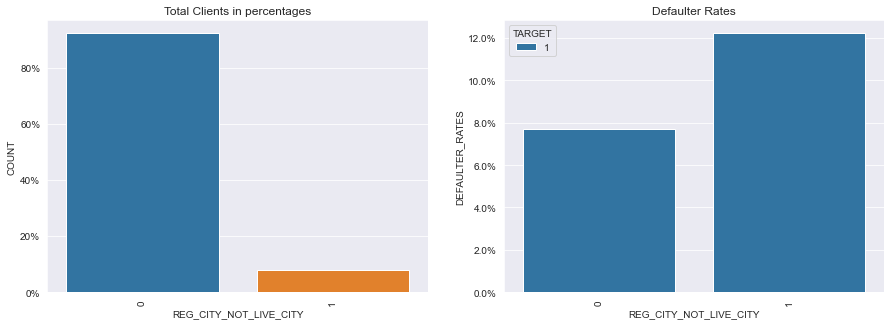

,REG_CITY_NOT_WORK_CITY,COUNT,TARGET,DEFAULTER_RATES
0,0,76.955,1,7.313
1,1,23.045,1,10.611


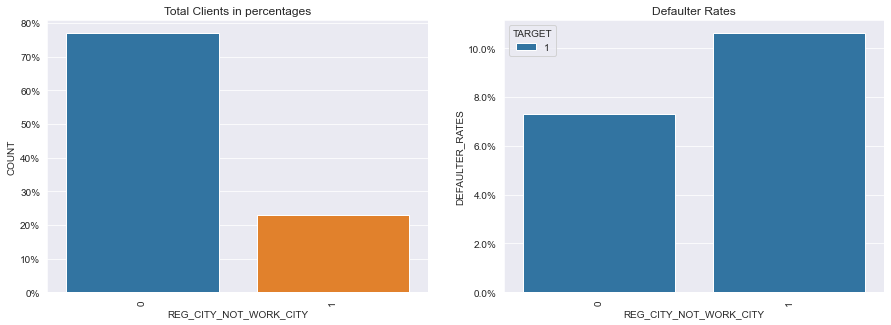

,LIVE_CITY_NOT_WORK_CITY,COUNT,TARGET,DEFAULTER_RATES
0,0,82.045,1,7.658
1,1,17.955,1,9.966


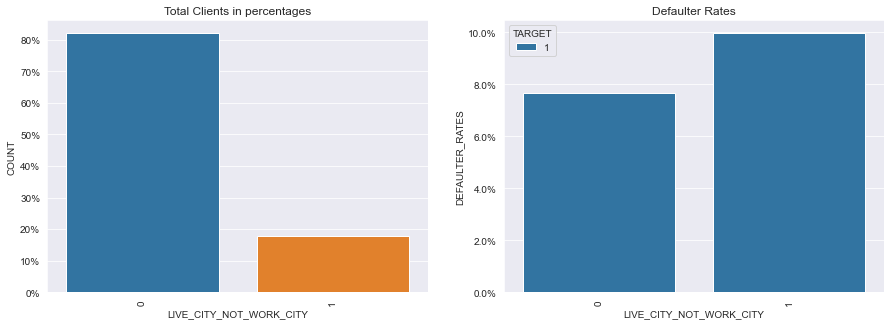

ValueError: Could not interpret input 'ORGANIZATION_TYPE'

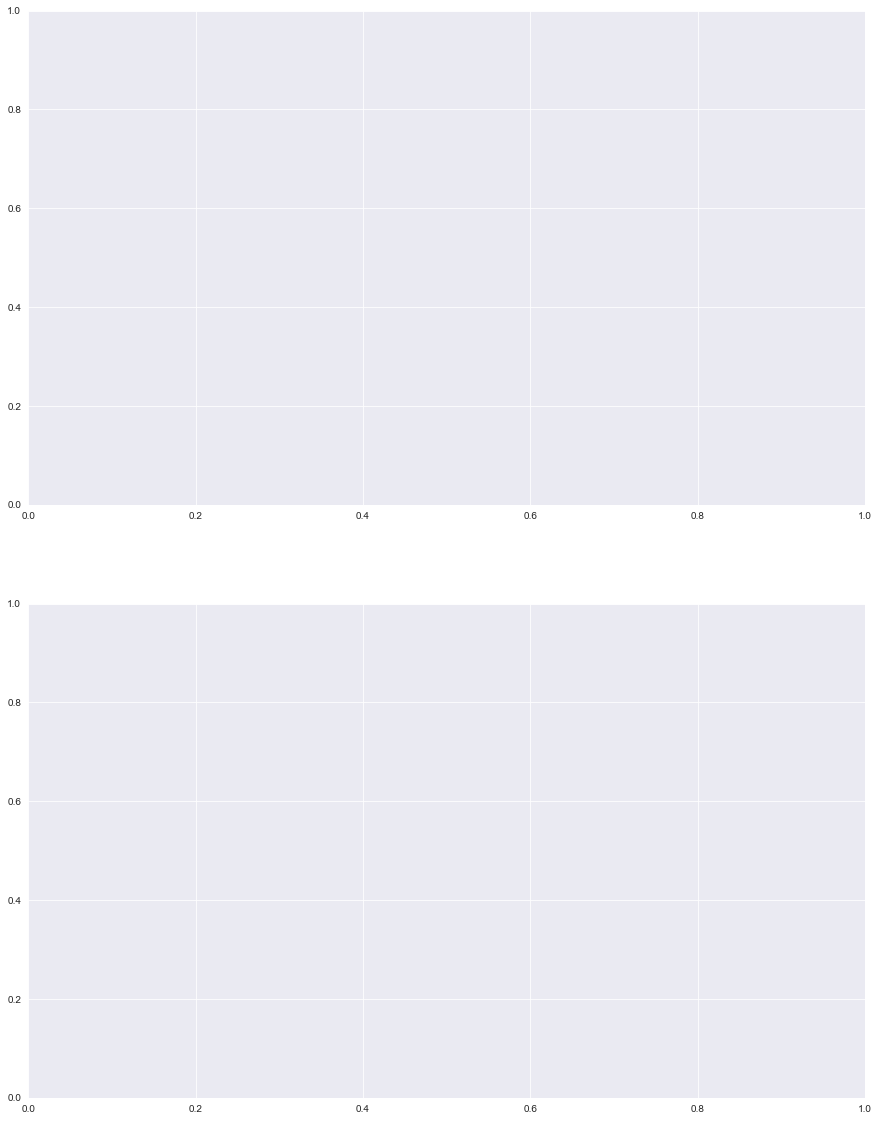

In [27]:
import matplotlib.ticker as mtick
for col in cat.drop('TARGET'):
    a = application.groupby([col]).count()[['SK_ID_CURR']].sort_values(['SK_ID_CURR'],ascending=False)
    a = a.rename(columns={'SK_ID_CURR':'COUNT'})
    a_target = application.groupby([col,"TARGET"]).count()[['SK_ID_CURR']]
    a_target = ((a_target/a_target.groupby(level=0).sum())*100).reset_index()
    a_target = a_target[a_target['TARGET']==1].rename(columns={'SK_ID_CURR':"DEFAULTER_RATES"}).sort_values('DEFAULTER_RATES',ascending=False)
    if(len(a)>25):
        a.reset_index(inplace=True)
        fig,ax = plt.subplots(2,1,figsize=(15,20))
    else:
        defaulter_rates = a.merge(a_target,on=col)
        defaulter_rates['COUNT'] = defaulter_rates['COUNT']/len(application)*100
        display(defaulter_rates)
        a.reset_index(inplace=True)
#         a['COUNT'] = a['COUNT']/len(application)*100
        fig,ax = plt.subplots(1,2,figsize=(15,5))
    sns.barplot(x=col,y="COUNT",data=defaulter_rates,order=a[col],ax=ax[0])
    sns.barplot(x=col,y="DEFAULTER_RATES",hue="TARGET",data=a_target,order=a[col],ax=ax[1])
    ax[0].yaxis.set_major_formatter(mtick.PercentFormatter())
    ax[1].yaxis.set_major_formatter(mtick.PercentFormatter())
#     plt.title(col)
    ax[1].set_title('Defaulter Rates')
    ax[0].set_title('Total Clients in percentages')
    ax[0].tick_params(axis='x',rotation=90)
    ax[1].tick_params(axis='x',rotation=90)
    plt.show()

NameError: name 'defaulter_rates' is not defined

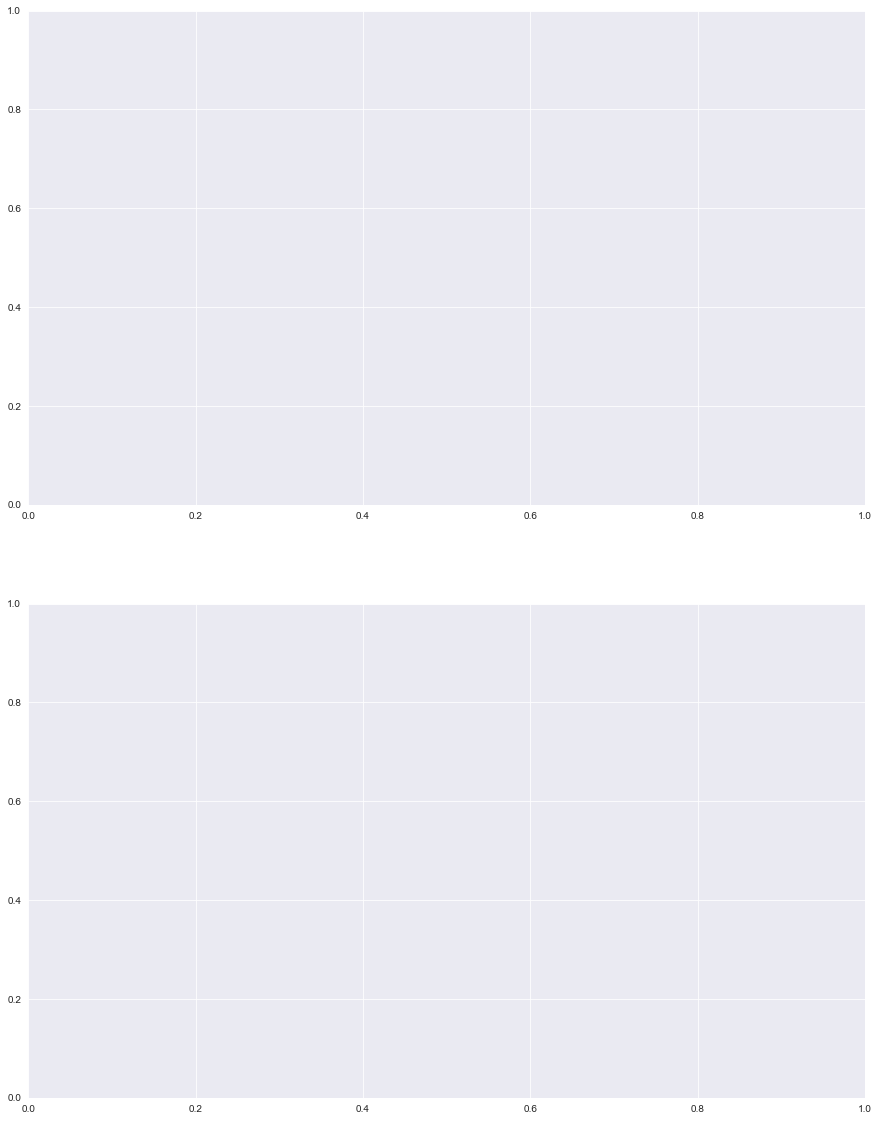

In [8]:
col = "ORGANIZATION_TYPE"

a = application.groupby([col]).count()[['SK_ID_CURR']].sort_values(['SK_ID_CURR'],ascending=False)
a = a.rename(columns={'SK_ID_CURR':'COUNT'})
a_target = application.groupby([col,"TARGET"]).count()[['SK_ID_CURR']]
a_target = ((a_target/a_target.groupby(level=0).sum())*100).reset_index()
a_target = a_target[a_target['TARGET']==1].rename(columns={'SK_ID_CURR':"DEFAULTER_RATES"}).sort_values('DEFAULTER_RATES',ascending=False)
if(len(a)>25):
    a.reset_index(inplace=True)
    fig,ax = plt.subplots(2,1,figsize=(15,20))
else:
    defaulter_rates = a.merge(a_target,on=col)
    defaulter_rates['COUNT'] = defaulter_rates['COUNT']/len(application)*100
    display(defaulter_rates)
    a.reset_index(inplace=True)
    fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=col,y="COUNT",data=defaulter_rates,order=a[col],ax=ax[0])
sns.barplot(x=col,y="DEFAULTER_RATES",hue="TARGET",data=a_target,order=a[col],ax=ax[1])
#     plt.title(col)
ax[0].set_title('Defaulter Rates')
ax[1].set_title('Total Clients in percentages')
ax[0].tick_params(axis='x',rotation=90)
ax[1].tick_params(axis='x',rotation=90)
plt.show()

### Education Type w.r.t Income Type

In [42]:
a = application.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a['TotalCount'] = a_level1['SK_ID_CURR']
a['Defaulter_rates'] = a_default['SK_ID_CURR']
a.drop(['SK_ID_CURR'],axis=1,inplace=True)
# a = a.rename(columns={'SK_ID_CURR':'COUNTwrtTarget'})
a = a.unstack().drop([('Defaulter_rates', 0),('TotalCount', 0)],axis=1).fillna(0).stack()
a = a.reset_index(level=-1).drop('TARGET',axis=1)
a['Proportions'] = a['TotalCount']/len(application)*100
education_type = a.reset_index()
education_type = education_type.drop(23).reset_index(drop=True)

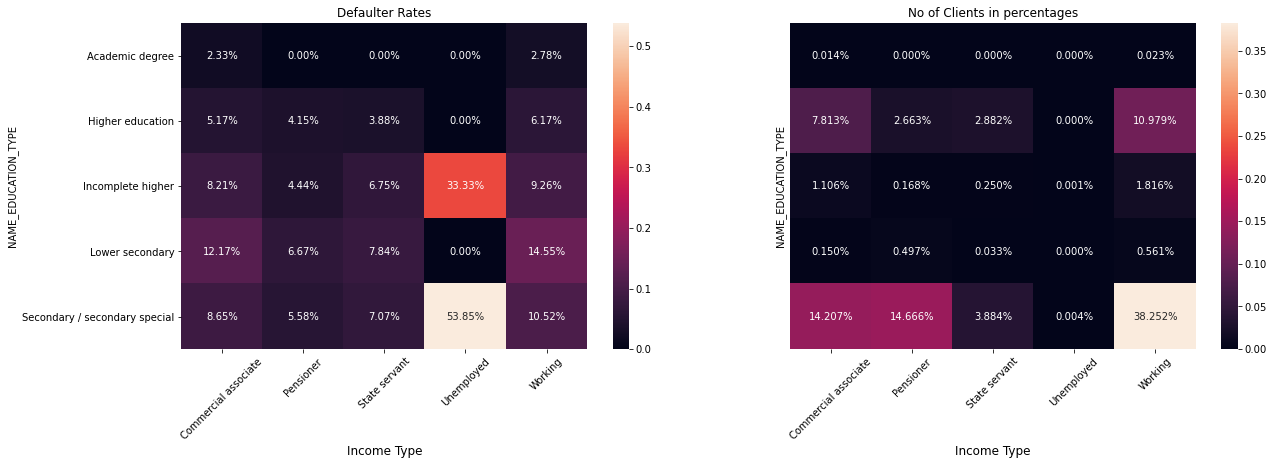

In [43]:
fig,ax = plt.subplots(1,2,figsize=(20,6))


sns.heatmap(a['Defaulter_rates'].unstack().fillna(0).drop(['Maternity leave','Businessman','Student'],axis=1)/100
            ,annot=True,fmt=".2%",ax=ax[0])
plt.sca(ax[0])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Income Type',size=12)
plt.title('Defaulter Rates')


sns.heatmap(a['Proportions'].unstack().fillna(0).drop(['Maternity leave','Businessman','Student'],axis=1)/100
            ,annot=True,fmt=".3%",ax=ax[1])
plt.sca(ax[1])
ax[1].set_yticks([])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.xlabel('Income Type',size=12)
plt.title('No of Clients in percentages')
plt.show()

## AGE

In [10]:
application['DAYS_BIRTH'] = np.abs(application['DAYS_BIRTH']/365)

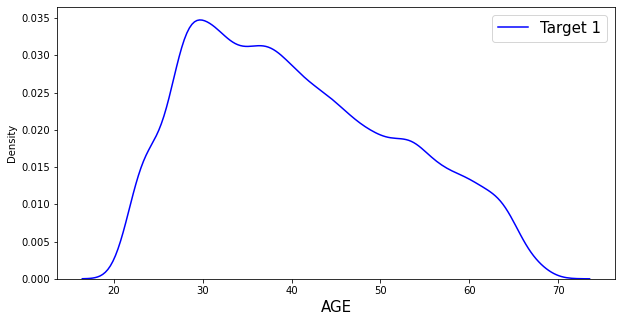

In [48]:
plt.figure(figsize=(10,5))
# sns.kdeplot(application[application['TARGET']==0]['DAYS_BIRTH'],label='Target 0',color='blue')
sns.kdeplot(application[application['TARGET']==1]['DAYS_BIRTH'],label='Target 1',color='blue')
plt.ticklabel_format(style='plain', axis='both')
plt.legend(prop={'size':15})
plt.xlabel('AGE',size=15)
plt.show()

In [17]:
age_bins = [20,30,40,50,60,70]
application['Age_bins'] = pd.cut(application['DAYS_BIRTH'],bins=age_bins,labels=['20-30','30-40','40-50','50-60','60-70'])
a = application.groupby(['Age_bins','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1['SK_ID_CURR']/len(application)*100
a = a.rename(columns={'SK_ID_CURR':'TotalCount'}).reset_index()
a

,Age_bins,TotalCount,Defaulter_rates
0,20-30,14.640,11.457
1,30-40,26.766,9.584
2,40-50,24.890,7.651
3,50-60,22.133,6.130
4,60-70,11.570,4.921


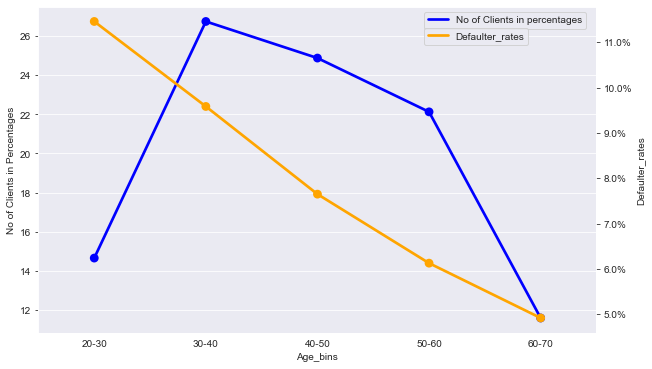

In [18]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(10,6))
#figsize=(10,5)


sns.pointplot(x='Age_bins',y='TotalCount',data=a,ax=ax1,color='blue',legend=False)
# ax1.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=2))
ax1.set(ylabel='No of Clients in Percentages')
ax2 = ax1.twinx()


sns.pointplot(x='Age_bins',y='Defaulter_rates',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(labels=['Defaulter_rates'],bbox_to_anchor=(0.88715,0.95))
ax1.legend(labels=['Total Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.grid(None)

plt.show()

## Income Bins

In [231]:
ranges = [25649,120000,200000,117000000]
application['INCOME_BINS'] = pd.cut(application['AMT_INCOME_TOTAL'],bins=ranges,precision=0, labels=['Low','Medium','High' ])

In [241]:
a = application.groupby(['INCOME_BINS','TARGET']).count()[['SK_ID_CURR']]
a_level1 = a.groupby(level=0).sum()
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1['SK_ID_CURR']/len(application)
a = a.rename(columns={'SK_ID_CURR':'TotalCount'}).reset_index()
a

,INCOME_BINS,TotalCount,Defaulter_rates
0,Low,0.336,8.406
1,Medium,0.378,8.485
2,High,0.286,7.136


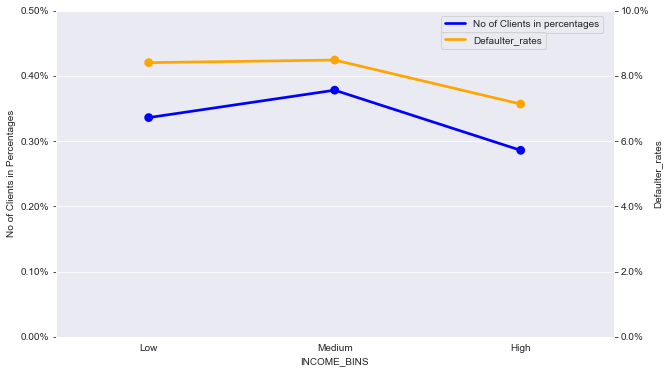

In [252]:
import matplotlib.ticker as mtick
fig, ax1 = plt.subplots(figsize=(10,6))
#figsize=(10,5)


sns.pointplot(x='INCOME_BINS',y='TotalCount',data=a,ax=ax1,color='blue',legend=False)
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
ax1.set(ylabel='No of Clients in Percentages')
ax1.set(ylim=(0,0.5))
ax2 = ax1.twinx()


sns.pointplot(x='INCOME_BINS',y='Defaulter_rates',data=a,ax=ax2,color='orange',legend=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.legend(leg_handles,labels=['Defaulter_rates'],bbox_to_anchor=(0.88715,0.95))
ax1.legend(labels=['No of Clients in percentages'],bbox_to_anchor=(0.99,1))
ax2.set(ylim=(0,10))
ax2.grid(None)

plt.show()

| Income Bins 	| Income Range            	| Count    	|
|-------------	|-------------------------	|----------	|
| Low         	|  25,649 - 1,20,000      	| 1,16,259 	|
| Medium      	| 1,20,000 - 2,00,000     	| 1,03,337 	|
| High        	| 2,00,000 - 11,70,00,000 	| 87,915   	|

### Id with other columns

In [7]:
application['Id_bins'] = pd.qcut(application['SK_ID_CURR'],q=10)
application['Id_bins'].value_counts()

(100001.999, 135692.0]    30752
(420729.0, 456255.0]      30751
(384696.0, 420729.0]      30751
(349428.0, 384696.0]      30751
(313865.0, 349428.0]      30751
(278202.0, 313865.0]      30751
(242626.0, 278202.0]      30751
(207121.0, 242626.0]      30751
(171327.0, 207121.0]      30751
(135692.0, 171327.0]      30751
Name: Id_bins, dtype: int64

In [264]:
plt.plot('Id_bins','COMMONAREA_AVG',data=application.fillna('Null'),marker='o-')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\manda\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3418, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-264-00f7c250acbc>", line 1, in <module>
    plt.plot('Id_bins','COMMONAREA_AVG',data=application.fillna('Null'),marker='o-')
  File "C:\Users\manda\Miniconda3\lib\site-packages\pandas\core\frame.py", line 4323, in fillna
    downcast=downcast,
  File "C:\Users\manda\Miniconda3\lib\site-packages\pandas\core\generic.py", line 6079, in fillna
    value=value, limit=limit, inplace=inplace, downcast=downcast
  File "C:\Users\manda\Miniconda3\lib\site-packages\pandas\core\internals\managers.py", line 586, in fillna
    "fillna", value=value, limit=limit, inplace=inplace, downcast=downcast
  File "C:\Users\manda\Miniconda3\lib\site-packages\pandas\core\internals\managers.py", line 406, in apply
    applied = getattr(b, f)(**kwargs)
  File "C:\Users\manda\Miniconda3\lib\site-

TypeError: object of type 'NoneType' has no len()

In [266]:
application['COMMONAREA_AVG'].describe()

count   92,646.000
mean         0.045
std          0.076
min          0.000
25%          0.008
50%          0.021
75%          0.051
max          1.000
Name: COMMONAREA_AVG, dtype: float64

In [273]:
application['COMMONAREA_AVG'].fillna()

0         False
1         False
2          True
3          True
4          True
          ...  
307506    False
307507    False
307508    False
307509     True
307510    False
Name: COMMONAREA_AVG, Length: 307511, dtype: bool

### https://towardsdatascience.com/visualizing-the-nothing-ae6daccc9197

In [275]:
import missingno as msno

<AxesSubplot:>

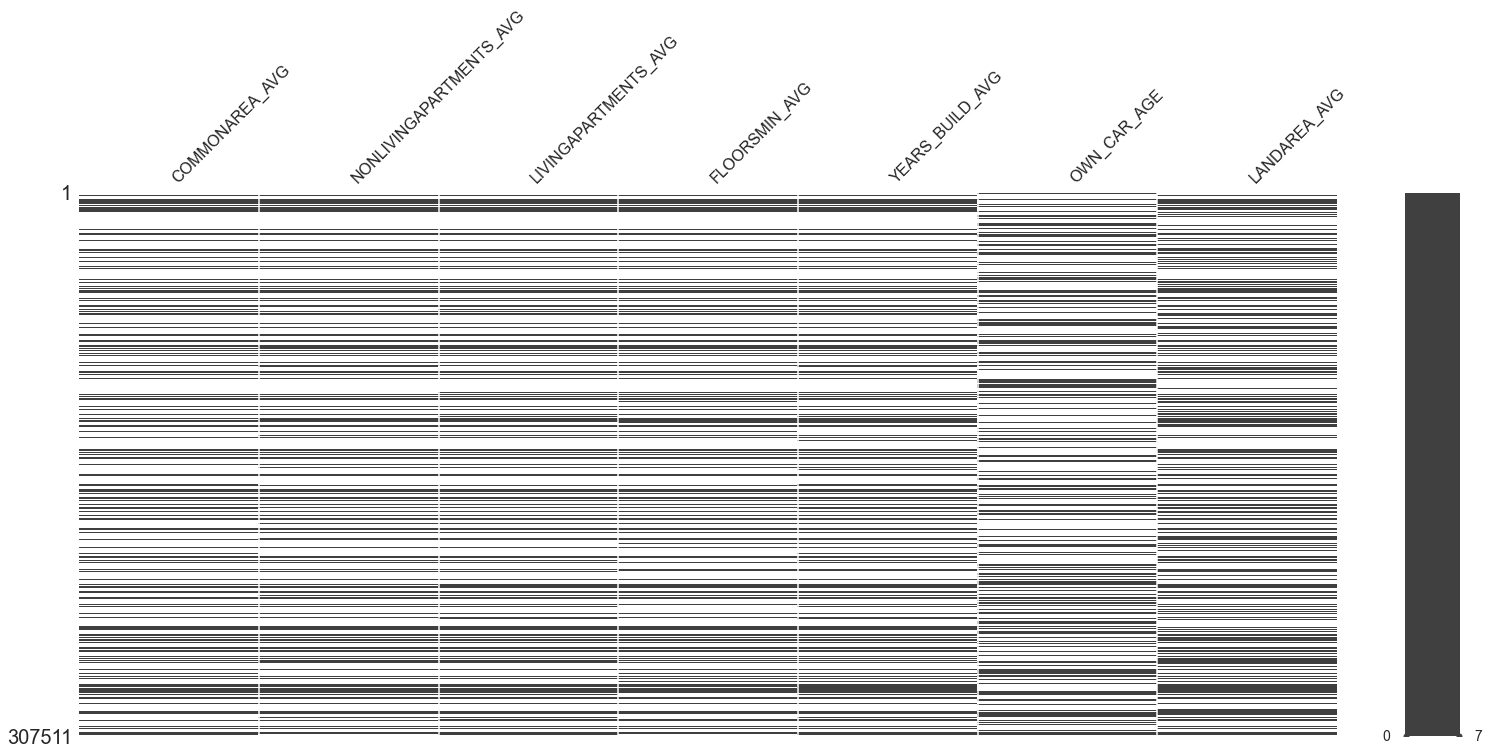

In [284]:
msno.matrix(application[['COMMONAREA_AVG','NONLIVINGAPARTMENTS_AVG','LIVINGAPARTMENTS_AVG','FLOORSMIN_AVG',
                        'YEARS_BUILD_AVG','OWN_CAR_AGE','LANDAREA_AVG']])

In [292]:
application['YEARS_EMPLOYED'] = np.abs(application['DAYS_EMPLOYED'])/365
application['YEARS_EMPLOYED']

0            1.745
1            3.255
2            0.616
3            8.326
4            8.323
            ...   
307506       0.647
307507   1,000.666
307508      21.701
307509      13.112
307510       3.458
Name: YEARS_EMPLOYED, Length: 307511, dtype: float64

<AxesSubplot:xlabel='YEARS_EMPLOYED'>

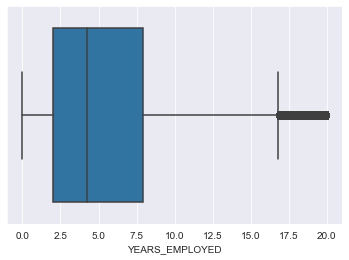

In [318]:
sns.boxplot(application[application['YEARS_EMPLOYED']<20]['YEARS_EMPLOYED'])

In [354]:
a = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE','INCOME_BINS','TARGET']).count()[['SK_ID_CURR']]
a_level1 = application.groupby(['ORGANIZATION_TYPE','OCCUPATION_TYPE','INCOME_BINS']).count()[['SK_ID_CURR']]
a_default = a/a_level1*100
a['Defaulter_rates'] = a_default
a = a.drop(0,level=-1).droplevel(level=-1)
a['SK_ID_CURR'] = a_level1
a = a.rename(columns={'SK_ID_CURR':'TotalCount'})
a = a.sort_values('Defaulter_rates',ascending=False).dropna()
a['TotalCount'] = a['TotalCount']/len(application)*100
a

TotalCount  \
ORGANIZATION_TYPE      OCCUPATION_TYPE       INCOME_BINS               
Trade: type 2          Low-skill Laborers    High              0.000   
Electricity            Secretaries           Medium            0.000   
Agriculture            Private service staff Medium            0.000   
Legal Services         IT staff              Medium            0.000   
Kindergarten           Waiters/barmen staff  High              0.000   
...                                                              ...   
                       Cooking staff         High              0.021   
University             High skill tech staff High              0.022   
Industry: type 11      High skill tech staff High              0.022   
University             Managers              High              0.024   
Business Entity Type 2 Core staff            High              0.037   

                                                          Defaulter_rates  
ORGANIZATION_TYPE      OCCUPATION_TYPE       INCOME_BINS                   
Trade: type 2          Low-skill Laborers    High                 100.000  
Electricity            Secretaries           Medium               100.000  
Agriculture            Private service staff Medium               100.000  
Legal Services         IT staff              Medium               100.000  
Kindergarten           Waiters/barmen staff  High                 100.000  
...                                                                   ...  
                       Cooking staff         High                   1.515  
University             High skill tech staff High                   1.493  
Industry: type 11      High skill tech staff High                   1.449  
University             Managers              High                   1.370  
Business Entity Type 2 Core staff            High                   0.870  

[1192 rows x 2 columns]

In [355]:
a.sort_values('TotalCount',ascending=False)

TotalCount  \
ORGANIZATION_TYPE      OCCUPATION_TYPE    INCOME_BINS               
Business Entity Type 3 Laborers           Medium            2.451   
Self-employed          Sales staff        Low               1.852   
                                          Medium            1.655   
Business Entity Type 3 Laborers           Low               1.622   
                                          High              1.612   
...                                                           ...   
Military               Low-skill Laborers Medium            0.000   
Trade: type 1          Low-skill Laborers Medium            0.000   
Industry: type 7       Medicine staff     Medium            0.000   
                       Secretaries        Medium            0.000   
Trade: type 2          Low-skill Laborers High              0.000   

                                                       Defaulter_rates  
ORGANIZATION_TYPE      OCCUPATION_TYPE    INCOME_BINS                   
Business Entity Type 3 Laborers           Medium                11.542  
Self-employed          Sales staff        Low                   10.060  
                                          Medium                 9.548  
Business Entity Type 3 Laborers           Low                   10.964  
                                          High                  10.389  
...                                                                ...  
Military               Low-skill Laborers Medium               100.000  
Trade: type 1          Low-skill Laborers Medium               100.000  
Industry: type 7       Medicine staff     Medium               100.000  
                       Secretaries        Medium               100.000  
Trade: type 2          Low-skill Laborers High                 100.000  

[1192 rows x 2 columns]

In [356]:
a.reset_index()
sns.barplot(x='ORGANIZATION_TYPE',y='TARGET',)

,ORGANIZATION_TYPE,OCCUPATION_TYPE,INCOME_BINS,TotalCount,Defaulter_rates
0,Trade: type 2,Low-skill Laborers,High,0.000,100.000
1,Electricity,Secretaries,Medium,0.000,100.000
2,Agriculture,Private service staff,Medium,0.000,100.000
3,Legal Services,IT staff,Medium,0.000,100.000
4,Kindergarten,Waiters/barmen staff,High,0.000,100.000
...,...,...,...,...,...
1187,Kindergarten,Cooking staff,High,0.021,1.515
1188,University,High skill tech staff,High,0.022,1.493
1189,Industry: type 11,High skill tech staff,High,0.022,1.449
1190,University,Managers,High,0.024,1.370


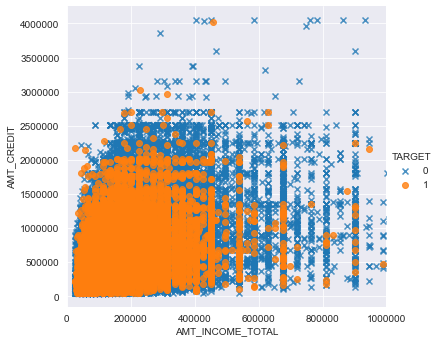

In [363]:
sns.lmplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',hue='TARGET',
          markers=['x','o'],
          fit_reg=False,data=application)
plt.ticklabel_format(style='plain', axis='both')
plt.xlim(0,1000000)
plt.show()

In [365]:
previous_application.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [366]:
previous_application.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,"1,730.430","17,145.000","17,145.000",0.000,"17,145.000",SATURDAY,15,Y,1,0.000,0.183,0.867,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.000,middle,POS mobile with interest,"365,243.000",-42.000,300.000,-42.000,-37.000,0.000
1,2802425,108129,Cash loans,"25,188.615","607,500.000","679,671.000",nan,"607,500.000",THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.000,low_action,Cash X-Sell: low,"365,243.000",-134.000,916.000,"365,243.000","365,243.000",1.000
2,2523466,122040,Cash loans,"15,060.735","112,500.000","136,444.500",nan,"112,500.000",TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,high,Cash X-Sell: high,"365,243.000",-271.000,59.000,"365,243.000","365,243.000",1.000
3,2819243,176158,Cash loans,"47,041.335","450,000.000","470,790.000",nan,"450,000.000",MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.000,middle,Cash X-Sell: middle,"365,243.000",-482.000,-152.000,-182.000,-177.000,1.000
4,1784265,202054,Cash loans,"31,924.395","337,500.000","404,055.000",nan,"337,500.000",THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.000,high,Cash Street: high,nan,nan,nan,nan,nan,nan
5,1383531,199383,Cash loans,"23,703.930","315,000.000","340,573.500",nan,"315,000.000",SATURDAY,8,Y,1,nan,nan,nan,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.000,low_normal,Cash X-Sell: low,"365,243.000",-654.000,-144.000,-144.000,-137.000,1.000
6,2315218,175704,Cash loans,nan,0.000,0.000,nan,nan,TUESDAY,11,Y,1,nan,nan,nan,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan
7,1656711,296299,Cash loans,nan,0.000,0.000,nan,nan,MONDAY,7,Y,1,nan,nan,nan,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan
8,2367563,342292,Cash loans,nan,0.000,0.000,nan,nan,MONDAY,15,Y,1,nan,nan,nan,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan
9,2579447,334349,Cash loans,nan,0.000,0.000,nan,nan,SATURDAY,15,Y,1,nan,nan,nan,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,nan,XNA,Cash,nan,nan,nan,nan,nan,nan


In [367]:
previous_application['CHANNEL_TYPE'].value_counts()

Credit and cash offices       719968
Country-wide                  494690
Stone                         212083
Regional / Local              108528
Contact center                 71297
AP+ (Cash loan)                57046
Channel of corporate sales      6150
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

In [369]:
for col in cat:
    print(application[col].value_counts(),'\n')

0    282686
1     24825
Name: TARGET, dtype: int64 

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64 

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64 

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64 

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64 

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64 

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64 

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman          

0.000    257456
1.000      8208
2.000       199
3.000        58
4.000        34
6.000        20
5.000        10
8.000         5
7.000         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64 

0.000      215417
1.000       33862
2.000       14412
3.000        1717
4.000         476
5.000          64
6.000          28
8.000           7
7.000           7
261.000         1
19.000          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64 



In [370]:
application['ORGANIZATION_TYPE'].isna().sum()

0

In [371]:
application[application['ORGANIZATION_TYPE']=='XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Age_bins,INCOME_BINS,Id_bins,YEARS_EMPLOYED
8,100011,0,Cash loans,F,N,Y,0,"112,500.000","1,019,610.000","33,826.500","913,500.000",Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.019,55.066,365243,"-7,427.000",-3514,nan,1,0,0,1,0,0,NaN,2.000,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.587,0.206,0.752,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,1.000,0.000,1.000,0.000,0.000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,50-60,Low,"(100001.999, 135692.0]","1,000.666"
11,100015,0,Cash loans,F,N,Y,0,"38,419.155","148,365.000","10,678.500","135,000.000",Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015,55.937,365243,"-5,246.000",-2512,nan,1,0,0,1,1,0,NaN,2.000,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.722,0.555,0.653,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.000,0.000,0.000,0.000,"-2,396.000",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,2.000,50-60,Low,"(100001.999, 135692.0]","1,000.666"
23,100027,0,Cash loans,F,N,Y,0,"83,250.000","239,850.000","23,850.000","225,000.000",Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006,68.019,365243,"-9,012.000",-3684,nan,1,0,0,1,1,0,NaN,2.000,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,nan,0.624,0.669,0.144,0.085,0.988,0.830,0.106,0.140,0.121,0.375,0.417,0.237,0.117,0.148,0.002,0.001,0.126,0.075,0.988,0.837,0.000,0.121,0.103,0.375,0.417,0.242,0.110,0.092,0.000,0.000,0.146,0.085,0.988,0.832,0.107,0.140,0.121,0.375,0.417,0.241,0.119,0.151

In [ ]:
sns.lmplot(x='Id_bins',y='ORGANIZATION_TYPE',hue='TARGET',data=application)

In [7]:
application['AMT_CREDIT']/application['AMT_INCOME_TOTAL']*100

0        200.789
1        479.075
2        200.000
3        231.617
4        422.222
           ...  
307506   161.714
307507   374.375
307508   442.918
307509   216.437
307510   428.571
Length: 307511, dtype: float64